# TOPIC: Covid Vaccination Analysis

### Objectives: 

1) Distinguishing Developed and under developed country

2) Death rate in developed and under developed countries.

3) Ranking of countries based on the percentage of the population that has been vaccinated and the economical status of the country. 

4) Which country uses what type of vaccine.

5) What Vaccines were used most predominantly and their percentage in the data set (univariate analysis).

6) What vaccine had the highest death rate (and how did that correlate with developed and under developed countries)

7) Country and the vaccination rate. Are old people(age 65+)hesitant to get vaccinated? Does that affect the vaccination rate?

8) Does age affect the death rate. Countries with older people maybe more prone to a higher death rate?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [2]:
df1=pd.read_csv("owid-covid-data (1).csv")
display(df1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159776,ZWE,Africa,Zimbabwe,2022-02-01,229851.0,185.0,153.571,5350.0,12.0,4.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
159777,ZWE,Africa,Zimbabwe,2022-02-02,230012.0,161.0,152.714,5352.0,2.0,4.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
159778,ZWE,Africa,Zimbabwe,2022-02-03,230170.0,158.0,153.429,5357.0,5.0,4.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
159779,ZWE,Africa,Zimbabwe,2022-02-04,230170.0,0.0,119.571,5357.0,0.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Uploading the dataset into the dataframe

# 1) Distinguishing bw developed and under developed country

#### Dropping unnecessary columns

In [3]:
df1.drop(df1.columns.difference(['iso_code','date','total_deaths','total_cases','population','aged_65_older','aged_70_older','gdp_per_capita','human_development_index']), 1, inplace=True)
display(df1)

/var/folders/y6/r6j6rly10cv1_2pn9gk5k1yr0000gn/T/ipykernel_9305/3901599900.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop(df1.columns.difference(['iso_code','date','total_deaths','total_cases','population','aged_65_older','aged_70_older','gdp_per_capita','human_development_index']), 1, inplace=True)


,iso_code,date,total_cases,total_deaths,population,aged_65_older,aged_70_older,gdp_per_capita,human_development_index
0,AFG,2020-02-24,5.0,NaN,39835428.0,2.581,1.337,1803.987,0.511
1,AFG,2020-02-25,5.0,NaN,39835428.0,2.581,1.337,1803.987,0.511
2,AFG,2020-02-26,5.0,NaN,39835428.0,2.581,1.337,1803.987,0.511
3,AFG,2020-02-27,5.0,NaN,39835428.0,2.581,1.337,1803.987,0.511
4,AFG,2020-02-28,5.0,NaN,39835428.0,2.581,1.337,1803.987,0.511
...,...,...,...,...,...,...,...,...,...
159776,ZWE,2022-02-01,229851.0,5350.0,15092171.0,2.822,1.882,1899.775,0.571
159777,ZWE,2022-02-02,230012.0,5352.0,15092171.0,2.822,1.882,1899.775,0.571
159778,ZWE,2022-02-03,230170.0,5357.0,15092171.0,2.822,1.882,1899.775,0.571
159779,ZWE,2022-02-04,230170.0,5357.0,15092171.0,2.822,1.882,1899.775,0.571


#### Adding the country codes of the countries that overlapped between the two datasets

In [4]:
df1 = df1.loc[df1['iso_code'].isin(['AUT','BEL','BGR','CHL','HRV','CYP','CZE','DNK','ECU','EST','OWID_EUN','FIN','FRA',
'DEU','HKG','HUN','ISL',
'IRL','ITA','JPN','LVA','LIE','LTU','LUX','MLT','NLD','NOR','PER','POL','PRT','ROU','SVK','SVN',
'KOR','ESP','SWE','CHE','UKR','USA','URY'])]
display(df1)

,iso_code,date,total_cases,total_deaths,population,aged_65_older,aged_70_older,gdp_per_capita,human_development_index
9287,AUT,2020-02-25,2.0,NaN,9043072.0,19.202,13.748,45436.686,0.922
9288,AUT,2020-02-26,2.0,NaN,9043072.0,19.202,13.748,45436.686,0.922
9289,AUT,2020-02-27,3.0,NaN,9043072.0,19.202,13.748,45436.686,0.922
9290,AUT,2020-02-28,3.0,NaN,9043072.0,19.202,13.748,45436.686,0.922
9291,AUT,2020-02-29,9.0,NaN,9043072.0,19.202,13.748,45436.686,0.922
...,...,...,...,...,...,...,...,...,...
153223,URY,2022-02-01,679878.0,6513.0,3485152.0,14.655,10.361,20551.409,0.817
153224,URY,2022-02-02,690496.0,6540.0,3485152.0,14.655,10.361,20551.409,0.817
153225,URY,2022-02-03,700511.0,6579.0,3485152.0,14.655,10.361,20551.409,0.817
153226,URY,2022-02-04,710874.0,6606.0,3485152.0,14.655,10.361,20551.409,0.817


# Rich Countries from the set

#### Mentioning the constraints for a developing country and filtering out the countries that did not meet the criteria.

In [5]:
dfrich=df1[(df1['gdp_per_capita'] >= 15000) & (df1['human_development_index'] >= 0.800) ]
dfrich=dfrich.iso_code.drop_duplicates()
dfrich=dfrich.sample(35)
display(dfrich)

133968    KOR
70567     IRL
14216     BEL
66253     ISL
9287      AUT
34747     HRV
135386    ESP
152533    URY
108630    NOR
65548     HUN
116763    PRT
51737     FRA
38953     DNK
138252    SWE
118178    ROU
45270     EST
86658     LUX
80330     LVA
116059    POL
36849     CYP
151041    USA
129912    SVK
50998     FIN
84490     LTU
102619    NLD
55272     DEU
74114     JPN
29585     CHL
72680     ITA
37549     CZE
91611     MLT
138988    CHE
64803     HKG
130614    SVN
22560     BGR
Name: iso_code, dtype: object

Mentioning the constraints for a developed country and filtering out the countries that did not meet the criteria
displaying a random sample of 10 from the result

# Poor Countries from the set

#### Mentioning the constraints for a developing country and filtering out the countries that did not meet the criteria. Since the dataset did not have the data of many developing countries, Ukraine, Peru and Ecuador are the only countries.

In [6]:
dfpoor=df1[(df1['gdp_per_capita'] < 15000) & (df1['human_development_index'] < 0.800)]
dfpoor=dfpoor.iso_code.drop_duplicates()
dfpoor=dfpoor.sample(3)
display(dfpoor)

114469    PER
41771     ECU
148860    UKR
Name: iso_code, dtype: object

### Narrowing down all the results based on one common day, so that it is easier and efficient for analysis 

In [7]:
df2 = df1.loc[df1['date'].isin(['2021-01-01'])]
df2 = df2.dropna(0)
display(df2)


/var/folders/y6/r6j6rly10cv1_2pn9gk5k1yr0000gn/T/ipykernel_9305/2605761014.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df2 = df2.dropna(0)


,iso_code,date,total_cases,total_deaths,population,aged_65_older,aged_70_older,gdp_per_capita,human_development_index
9598,AUT,2021-01-01,362911.0,6261.0,9043072.0,19.202,13.748,45436.686,0.922
14548,BEL,2021-01-01,648289.0,19581.0,11632334.0,18.571,12.849,42658.576,0.931
22859,BGR,2021-01-01,202540.0,7604.0,6896655.0,20.801,13.272,18563.307,0.816
29898,CHL,2021-01-01,612564.0,16660.0,19212362.0,11.087,6.938,22767.037,0.851
35058,HRV,2021-01-01,212007.0,3961.0,4081657.0,19.724,13.053,22669.797,0.851
37148,CYP,2021-01-01,23108.0,126.0,896005.0,13.416,8.563,32415.132,0.887
37855,CZE,2021-01-01,732022.0,11711.0,10724553.0,19.027,11.580,32605.906,0.900
39287,DNK,2021-01-01,165930.0,1322.0,5813302.0,19.677,12.325,46682.515,0.940
42077,ECU,2021-01-01,213378.0,14051.0,17888474.0,7.104,4.458,10581.936,0.759
45603,EST,2021-01-01,28406.0,234.0,1325188.0,19.452,13.491,29481.252,0.892


# 2) Death Rate in developed and under developed countries

# 3) Ranking the countries based on the GDP & Death Rate

sorting the obtained data based on gdp per capita in descending order

In [8]:
df2['death_rate']=(df2['total_deaths']/df2['total_cases'])*100
df2.sort_values('death_rate',inplace = True, ascending = False)
display(df2)

,iso_code,date,total_cases,total_deaths,population,aged_65_older,aged_70_older,gdp_per_capita,human_development_index,death_rate
114835,PER,2021-01-01,1015137.0,93231.0,33359415.0,7.151,4.455,12236.706,0.777,9.184081
42077,ECU,2021-01-01,213378.0,14051.0,17888474.0,7.104,4.458,10581.936,0.759,6.585028
22859,BGR,2021-01-01,202540.0,7604.0,6896655.0,20.801,13.272,18563.307,0.816,3.754320
73016,ITA,2021-01-01,2129376.0,74621.0,60367471.0,23.021,16.240,35220.084,0.892,3.504360
14548,BEL,2021-01-01,648289.0,19581.0,11632334.0,18.571,12.849,42658.576,0.931,3.020412
65852,HUN,2021-01-01,325278.0,9667.0,9634162.0,18.577,11.976,26777.561,0.854,2.971919
29898,CHL,2021-01-01,612564.0,16660.0,19212362.0,11.087,6.938,22767.037,0.851,2.719716
135721,ESP,2021-01-01,1928265.0,50837.0,46745211.0,19.436,13.799,34272.360,0.904,2.636411
118488,ROU,2021-01-01,636201.0,15841.0,19127772.0,17.850,11.690,23313.199,0.828,2.489936
52080,FRA,2021-01-01,2680034.0,64777.0,67422000.0,19.718,13.079,38605.671,0.901,2.417022


In [9]:
df2.sort_values('gdp_per_capita',inplace = True, ascending = False)
display(df2)

,iso_code,date,total_cases,total_deaths,population,aged_65_older,aged_70_older,gdp_per_capita,human_development_index,death_rate
86970,LUX,2021-01-01,46415.0,495.0,634814.0,14.312,9.842,94277.965,0.916,1.066466
70874,IRL,2021-01-01,93532.0,2248.0,4982904.0,13.928,8.678,67335.293,0.955,2.403456
108941,NOR,2021-01-01,49803.0,436.0,5465629.0,16.821,10.813,64800.057,0.957,0.875449
139299,CHE,2021-01-01,452296.0,7948.0,8715494.0,18.436,12.644,57410.166,0.955,1.757256
65147,HKG,2021-01-01,8888.0,148.0,7552800.0,16.303,10.158,56054.920,0.949,1.665167
151386,USA,2021-01-01,20365726.0,353948.0,332915074.0,15.413,9.732,54225.446,0.926,1.737959
102928,NLD,2021-01-01,806622.0,11556.0,17173094.0,18.779,11.881,48472.545,0.944,1.432641
138587,SWE,2021-01-01,437379.0,8727.0,10160159.0,19.985,13.433,46949.283,0.945,1.995295
39287,DNK,2021-01-01,165930.0,1322.0,5813302.0,19.677,12.325,46682.515,0.940,0.796722
66561,ISL,2021-01-01,5754.0,29.0,368792.0,14.431,9.207,46482.958,0.949,0.503997


### Displaying the simple statistics of Death Rate column and GDP column

In [10]:
display(df2.death_rate.describe())

display(df2.gdp_per_capita.describe())

count    38.000000
mean      2.125161
std       1.604590
min       0.503997
25%       1.444871
50%       1.731588
75%       2.413630
max       9.184081
Name: death_rate, dtype: float64

count       38.000000
mean     37034.433947
std      16994.888390
min       7894.393000
25%      26887.282000
50%      34746.222000
75%      46221.390000
max      94277.965000
Name: gdp_per_capita, dtype: float64

### We plot a boxplot of the death rate and gdp per capita to visualize the number of outliers

/Users/sricharan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


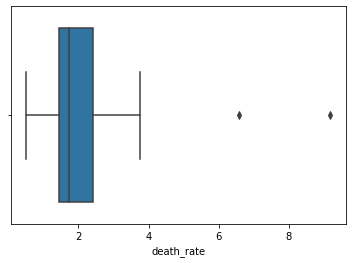

/Users/sricharan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdp_per_capita'>

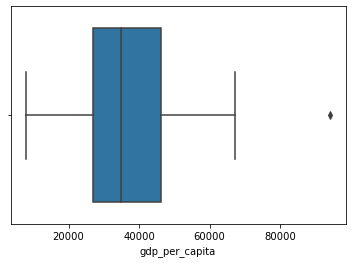

In [11]:
sns.boxplot(df2['death_rate']) 
plt.show()
sns.boxplot(df2['gdp_per_capita'])

#### graph 1: in the scale of 10 there are 2 countries whose death rate are much higher than the other countries which  is  an outlier. Almost 50% of the countries are present in the interquartile range. The box is quite narrow and only spread over a small range around 2, thus to evince the density we have plotted another histogram to get a better picture of the dense region and to see the skew.


#### graph 2: there is exactly one country which has the highest gdp more than 80000 which is an outlier, also 50% of the countries lie inside the interquartile range. The data points are densely packed within a range of 15000.

#### For a clearer visualisation we have created a histogram where we can see the peaks of the density in both death rate and gdp. The plot is slightly skewed to the left in each case so we have to normalise the data to remove outliers for a better analysis.

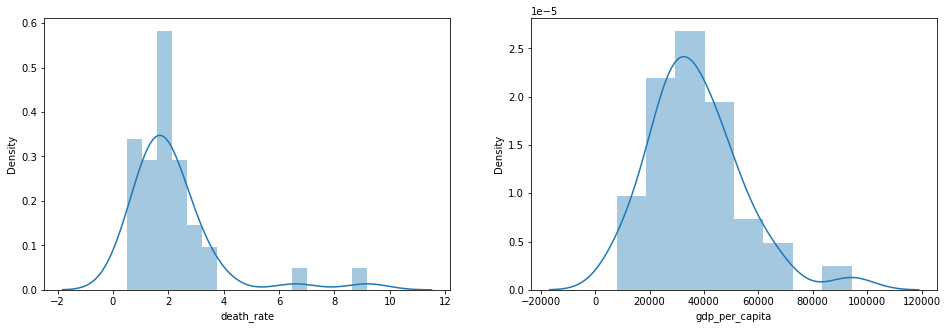

In [12]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['death_rate'])
plt.subplot(1,2,2)
sns.distplot(df2['gdp_per_capita'])
plt.show()

In [13]:
mean_dr = 2.124596
df_21 = df2.loc[df2['death_rate'] >= mean_dr]

display(df_21.loc[df_21['gdp_per_capita'] >= 15000])
display(df_21)

,iso_code,date,total_cases,total_deaths,population,aged_65_older,aged_70_older,gdp_per_capita,human_development_index,death_rate
70874,IRL,2021-01-01,93532.0,2248.0,4982904.0,13.928,8.678,67335.293,0.955,2.403456
14548,BEL,2021-01-01,648289.0,19581.0,11632334.0,18.571,12.849,42658.576,0.931,3.020412
52080,FRA,2021-01-01,2680034.0,64777.0,67422000.0,19.718,13.079,38605.671,0.901,2.417022
73016,ITA,2021-01-01,2129376.0,74621.0,60367471.0,23.021,16.240,35220.084,0.892,3.504360
135721,ESP,2021-01-01,1928265.0,50837.0,46745211.0,19.436,13.799,34272.360,0.904,2.636411
130948,SVN,2021-01-01,123950.0,2728.0,2078723.0,19.062,12.930,31400.840,0.917,2.200887
116362,POL,2021-01-01,1305774.0,28956.0,37797000.0,16.763,10.202,27216.445,0.880,2.217535
65852,HUN,2021-01-01,325278.0,9667.0,9634162.0,18.577,11.976,26777.561,0.854,2.971919
118488,ROU,2021-01-01,636201.0,15841.0,19127772.0,17.850,11.690,23313.199,0.828,2.489936
29898,CHL,2021-01-01,612564.0,16660.0,19212362.0,11.087,6.938,22767.037,0.851,2.719716


,iso_code,date,total_cases,total_deaths,population,aged_65_older,aged_70_older,gdp_per_capita,human_development_index,death_rate
70874,IRL,2021-01-01,93532.0,2248.0,4982904.0,13.928,8.678,67335.293,0.955,2.403456
14548,BEL,2021-01-01,648289.0,19581.0,11632334.0,18.571,12.849,42658.576,0.931,3.020412
52080,FRA,2021-01-01,2680034.0,64777.0,67422000.0,19.718,13.079,38605.671,0.901,2.417022
73016,ITA,2021-01-01,2129376.0,74621.0,60367471.0,23.021,16.240,35220.084,0.892,3.504360
135721,ESP,2021-01-01,1928265.0,50837.0,46745211.0,19.436,13.799,34272.360,0.904,2.636411
130948,SVN,2021-01-01,123950.0,2728.0,2078723.0,19.062,12.930,31400.840,0.917,2.200887
116362,POL,2021-01-01,1305774.0,28956.0,37797000.0,16.763,10.202,27216.445,0.880,2.217535
65852,HUN,2021-01-01,325278.0,9667.0,9634162.0,18.577,11.976,26777.561,0.854,2.971919
118488,ROU,2021-01-01,636201.0,15841.0,19127772.0,17.850,11.690,23313.199,0.828,2.489936
29898,CHL,2021-01-01,612564.0,16660.0,19212362.0,11.087,6.938,22767.037,0.851,2.719716


#### In the first line im displaying countries who have a death rate higher than the mean death rate. In the second im displaying the countries with a gdp less than 15k.

In [14]:
df_22 = df2.loc[df2['death_rate'] < mean_dr]
display(df_22)
display(df_22.loc[df_22['gdp_per_capita'] < 15000])

,iso_code,date,total_cases,total_deaths,population,aged_65_older,aged_70_older,gdp_per_capita,human_development_index,death_rate
86970,LUX,2021-01-01,46415.0,495.0,634814.0,14.312,9.842,94277.965,0.916,1.066466
108941,NOR,2021-01-01,49803.0,436.0,5465629.0,16.821,10.813,64800.057,0.957,0.875449
139299,CHE,2021-01-01,452296.0,7948.0,8715494.0,18.436,12.644,57410.166,0.955,1.757256
65147,HKG,2021-01-01,8888.0,148.0,7552800.0,16.303,10.158,56054.920,0.949,1.665167
151386,USA,2021-01-01,20365726.0,353948.0,332915074.0,15.413,9.732,54225.446,0.926,1.737959
102928,NLD,2021-01-01,806622.0,11556.0,17173094.0,18.779,11.881,48472.545,0.944,1.432641
138587,SWE,2021-01-01,437379.0,8727.0,10160159.0,19.985,13.433,46949.283,0.945,1.995295
39287,DNK,2021-01-01,165930.0,1322.0,5813302.0,19.677,12.325,46682.515,0.940,0.796722
66561,ISL,2021-01-01,5754.0,29.0,368792.0,14.431,9.207,46482.958,0.949,0.503997
9598,AUT,2021-01-01,362911.0,6261.0,9043072.0,19.202,13.748,45436.686,0.922,1.725216


,iso_code,date,total_cases,total_deaths,population,aged_65_older,aged_70_older,gdp_per_capita,human_development_index,death_rate
149164,UKR,2021-01-01,1096855.0,19437.0,43466822.0,16.462,11.133,7894.393,0.779,1.772066


In [15]:
df3=pd.read_csv('country_vaccinations_by_manufacturer.csv')
display(df3)

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31513
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
25778,European Union,2022-01-19,Oxford/AstraZeneca,67360430
25779,European Union,2022-01-19,Pfizer/BioNTech,547608975
25780,European Union,2022-01-19,Sinopharm/Beijing,2260921
25781,European Union,2022-01-19,Sinovac,9


In [16]:
display(df3.vaccine.unique())

array(['Johnson&Johnson', 'Moderna', 'Oxford/AstraZeneca',
       'Pfizer/BioNTech', 'Sinovac', 'CanSino', 'Sputnik V',
       'Sinopharm/Beijing'], dtype=object)

#### visualizing total number of doses of each vaccine administered
#### firstly we groupby the vaccines based on the total vaccinations administered in each country

In [17]:
most_vacc = df3[df3.total_vaccinations == df3.total_vaccinations.max()]
print(most_vacc,'\n\n\n\n')
least_vacc = df3[df3.total_vaccinations == df3.total_vaccinations.min()]
print(least_vacc)

             location        date          vaccine  total_vaccinations
25779  European Union  2022-01-19  Pfizer/BioNTech           547608975 




             location        date             vaccine  total_vaccinations
0             Austria  2021-01-08     Johnson&Johnson                   0
1             Austria  2021-01-08             Moderna                   0
2             Austria  2021-01-08  Oxford/AstraZeneca                   0
4             Austria  2021-01-15     Johnson&Johnson                   0
6             Austria  2021-01-15  Oxford/AstraZeneca                   0
...               ...         ...                 ...                 ...
23422  European Union  2021-02-16             Sinovac                   0
23429  European Union  2021-02-17             Sinovac                   0
23436  European Union  2021-02-18             Sinovac                   0
23443  European Union  2021-02-19             Sinovac                   0
23450  European Union  2021-02-20      

#### Country with the maximum number of vaccination as of 22-01-19
#### Country with the minimum number of vaccination as of 22-01-19

#### we check to see the case count as time progresses of the countries with the most and the least number of vaccinations as of 22-01-19


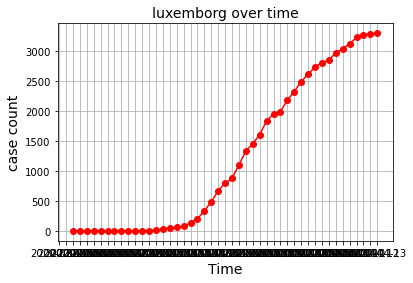

In [18]:
dflux = df1.loc[df1['iso_code']=='LUX']
dflux = dflux.head(50)
dflux.sort_values(['date'],inplace =True, ascending = True)
plt.plot(dflux['date'], dflux['total_cases'], color='red', marker='o')
plt.title('luxemborg over time', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('case count', fontsize=14)
plt.grid(True)
plt.show()

### luxemborg case count increases as the time increases. luxemborg is a developed country and its case count slightly started reducing as we can see the graph slightly flating down in the end so their vaccination drive helped them to reduce the case count.There was no sign for 2nd wave.

### Peru cases also increases as the time increases. Peru is a developing country and there is no sign for the case to be decreased we can tell that there is high chance for another wave .as it is a develpoing country it can't get a vaccine like pfzier to control the cases.

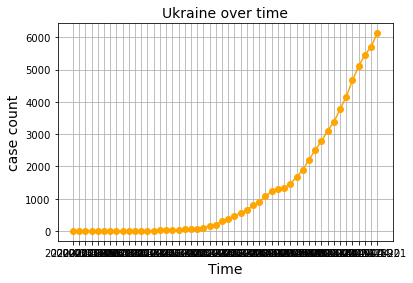

In [19]:
dflux = df1.loc[df1['iso_code']=='UKR']
dflux = dflux.head(50)
dflux.sort_values(['date'],inplace =True, ascending = True)
plt.plot(dflux['date'], dflux['total_cases'], color='orange', marker='o')
plt.title('Ukraine over time', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('case count', fontsize=14)
plt.grid(True)
plt.show()

### Ukraine cases are also increasing as the time increases .It is a developing country and it shown in the graph that the cases are steadily increasing and no chance for the case to reduce by anytime soon.so thhere is a high chance for another wave when the first wave itself not suppressed yet.

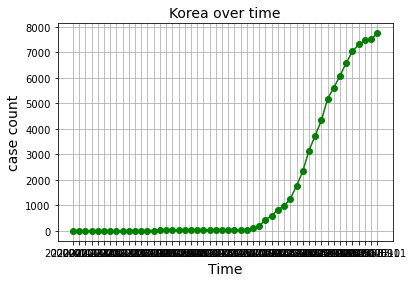

In [20]:
dflux = df1.loc[df1['iso_code']=='KOR']
dflux = dflux.head(50)
dflux.sort_values(['date'],inplace =True, ascending = True)
plt.plot(dflux['date'], dflux['total_cases'], color='green', marker='o')
plt.title('Korea over time', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('case count', fontsize=14)
plt.grid(True)
plt.show()

### In korea cases are also increases by time but at some point the case slightly reduced and again it started shooting up indicating that another wave is started. Although korea is a developed country but still it's not as developed as luxemborg so it can't get vaccine like pfizer but they can use moderate vaccines like moderna.

#### we filter the data to find out how many vaccinations of each vaccine was adiministered on 31-12-2021

# 4) Which country uses what type of vaccine.

In [21]:
dataset = df3.groupby('vaccine')[['total_vaccinations']].sum()
dataset

,total_vaccinations
vaccine,
CanSino,166376221
Johnson&Johnson,9028817305
Moderna,69428899118
Oxford/AstraZeneca,32377309534
Pfizer/BioNTech,243002813875
Sinopharm/Beijing,2962760579
Sinovac,10450085625
Sputnik V,567855840


In [22]:
label_a = df3.groupby('vaccine')[['total_vaccinations']].sum().index.get_level_values(0)
print(label_a)

label_b = df3.groupby('vaccine')[['total_vaccinations']].sum().reset_index().total_vaccinations.values.tolist()
print(label_b)

Index(['CanSino', 'Johnson&Johnson', 'Moderna', 'Oxford/AstraZeneca',
       'Pfizer/BioNTech', 'Sinopharm/Beijing', 'Sinovac', 'Sputnik V'],
      dtype='object', name='vaccine')
[166376221, 9028817305, 69428899118, 32377309534, 243002813875, 2962760579, 10450085625, 567855840]


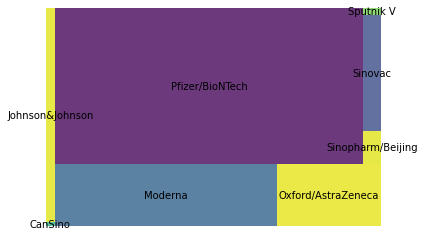

In [23]:
squarify.plot(sizes=label_b, label=label_a, alpha=0.8)
plt.axis('off')
plt.show()

### from the above treemap we understand that Pfizer/BioNTech was the most used vaccine

In [24]:
df3 = df3.loc[df3['date'].isin(['2021-12-31'])]
display(df3)

,location,date,vaccine,total_vaccinations
204,Austria,2021-12-31,Johnson&Johnson,355225
205,Austria,2021-12-31,Moderna,1469583
206,Austria,2021-12-31,Oxford/AstraZeneca,1583091
207,Austria,2021-12-31,Pfizer/BioNTech,12232947
424,Belgium,2021-12-31,Johnson&Johnson,414154
...,...,...,...,...
25645,European Union,2021-12-31,Oxford/AstraZeneca,67346458
25646,European Union,2021-12-31,Pfizer/BioNTech,521443295
25647,European Union,2021-12-31,Sinopharm/Beijing,2239173
25648,European Union,2021-12-31,Sinovac,9


# Countries and the Vaccines that they administered

In [42]:
df3_1 = df3.pivot(index='location', columns='vaccine', values='total_vaccinations')
df3_1 = df3_1.fillna(0)
display(df3_1)

vaccine,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V
location,,,,,,,,
Austria,0.0,355225.0,1469583.0,1583091.0,12232947.0,0.0,0.0,0.0
Belgium,0.0,414154.0,2317952.0,2843024.0,14695311.0,0.0,0.0,0.0
Bulgaria,0.0,465744.0,413494.0,478451.0,2307659.0,0.0,0.0,0.0
Chile,573768.0,0.0,0.0,546187.0,7656088.0,0.0,24492388.0,0.0
Croatia,0.0,188715.0,454326.0,566471.0,3467745.0,0.0,0.0,0.0
Cyprus,0.0,26428.0,135203.0,254490.0,1072696.0,0.0,0.0,0.0
Czechia,0.0,406202.0,1335985.0,0.0,12856901.0,0.0,0.0,0.0
Denmark,0.0,46913.0,1499226.0,155119.0,9608546.0,0.0,0.0,0.0
Ecuador,476711.0,0.0,0.0,3720268.0,7965940.0,0.0,15403412.0,0.0


### Here we add a new column to the above dataframe, total_vacc(total vaccinations) to find the total vaccines administered in each of the country

In [26]:
df3_1['total_vacc'] = df3_1['CanSino']+ df3_1['Johnson&Johnson']+df3_1['Moderna']+ df3_1['Oxford/AstraZeneca']+df3_1['Pfizer/BioNTech']+ df3_1['Sinopharm/Beijing']+df3_1['Sinovac']+ df3_1['Sputnik V']
display(df3_1)

vaccine,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V,total_vacc
location,,,,,,,,,
Austria,0.0,355225.0,1469583.0,1583091.0,12232947.0,0.0,0.0,0.0,15640846.0
Belgium,0.0,414154.0,2317952.0,2843024.0,14695311.0,0.0,0.0,0.0,20270441.0
Bulgaria,0.0,465744.0,413494.0,478451.0,2307659.0,0.0,0.0,0.0,3665348.0
Chile,573768.0,0.0,0.0,546187.0,7656088.0,0.0,24492388.0,0.0,33268431.0
Croatia,0.0,188715.0,454326.0,566471.0,3467745.0,0.0,0.0,0.0,4677257.0
Cyprus,0.0,26428.0,135203.0,254490.0,1072696.0,0.0,0.0,0.0,1488817.0
Czechia,0.0,406202.0,1335985.0,0.0,12856901.0,0.0,0.0,0.0,14599088.0
Denmark,0.0,46913.0,1499226.0,155119.0,9608546.0,0.0,0.0,0.0,11309804.0
Ecuador,476711.0,0.0,0.0,3720268.0,7965940.0,0.0,15403412.0,0.0,27566331.0


# 5) What Vaccines were used most predominantly and their percentage in the data set 

### now we find the percentage of each vaccine administered in each of the country and even plot a graph of the number of vaccinations of each
## vaccine administered in different countries

In [27]:
df3_1['Cansino%'] = (df3_1['CanSino']/ df3_1['total_vacc'])*100
df3_1['J&J%'] = (df3_1['Johnson&Johnson']/ df3_1['total_vacc'])*100
df3_1['Moderna%'] = (df3_1['Moderna']/ df3_1['total_vacc'])*100
df3_1['Oxford%'] = (df3_1['Oxford/AstraZeneca']/ df3_1['total_vacc'])*100
df3_1['Pfizer%'] = (df3_1['Pfizer/BioNTech']/ df3_1['total_vacc'])*100
df3_1['Sinopharm%'] = (df3_1['Sinopharm/Beijing']/ df3_1['total_vacc'])*100
df3_1['Sinovac%'] = (df3_1['Sinovac']/ df3_1['total_vacc'])*100
df3_1['Sputnik V%'] = (df3_1['Sputnik V']/ df3_1['total_vacc'])*100
display(df3_1)

vaccine,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V,total_vacc,Cansino%,J&J%,Moderna%,Oxford%,Pfizer%,Sinopharm%,Sinovac%,Sputnik V%
location,,,,,,,,,,,,,,,,,
Austria,0.0,355225.0,1469583.0,1583091.0,12232947.0,0.0,0.0,0.0,15640846.0,0.000000,2.271137,9.395803,10.121518,78.211543,0.000000,0.000000,0.000000
Belgium,0.0,414154.0,2317952.0,2843024.0,14695311.0,0.0,0.0,0.0,20270441.0,0.000000,2.043143,11.435134,14.025467,72.496257,0.000000,0.000000,0.000000
Bulgaria,0.0,465744.0,413494.0,478451.0,2307659.0,0.0,0.0,0.0,3665348.0,0.000000,12.706679,11.281166,13.053358,62.958797,0.000000,0.000000,0.000000
Chile,573768.0,0.0,0.0,546187.0,7656088.0,0.0,24492388.0,0.0,33268431.0,1.724662,0.000000,0.000000,1.641758,23.013072,0.000000,73.620508,0.000000
Croatia,0.0,188715.0,454326.0,566471.0,3467745.0,0.0,0.0,0.0,4677257.0,0.000000,4.034737,9.713514,12.111180,74.140570,0.000000,0.000000,0.000000
Cyprus,0.0,26428.0,135203.0,254490.0,1072696.0,0.0,0.0,0.0,1488817.0,0.000000,1.775101,9.081237,17.093437,72.050225,0.000000,0.000000,0.000000
Czechia,0.0,406202.0,1335985.0,0.0,12856901.0,0.0,0.0,0.0,14599088.0,0.000000,2.782379,9.151154,0.000000,88.066467,0.000000,0.000000,0.000000
Denmark,0.0,46913.0,1499226.0,155119.0,9608546.0,0.0,0.0,0.0,11309804.0,0.000000,0.414799,13.255986,1.371545,84.957670,0.000000,0.000000,0.000000
Ecuador,476711.0,0.0,0.0,3720268.0,7965940.0,0.0,15403412.0,0.0,27566331.0,1.729323,0.000000,0.000000,13.495695,28.897353,0.000000,55.877628,0.000000


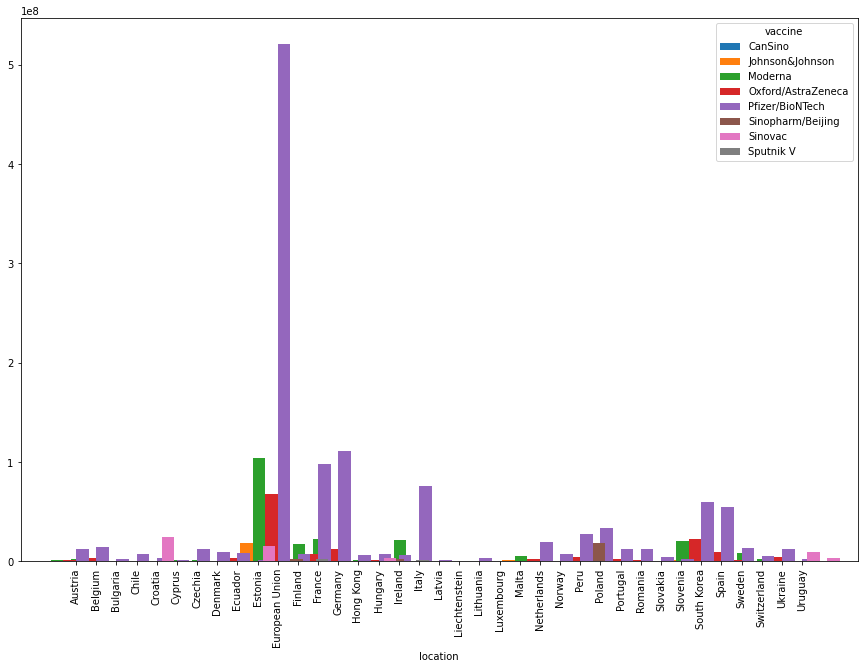

In [28]:
bargraph = df3_1.plot.bar(y = ['CanSino','Johnson&Johnson','Moderna','Oxford/AstraZeneca','Pfizer/BioNTech','Sinopharm/Beijing','Sinovac','Sputnik V'], fontsize='10',figsize=(15,10),width = 5)

### the vaccine pfizer/bioNtech is commonly used vaccine in european union whereas the least used vaccine was covacine. 
### most of the european countries like france,italy and germany there also percentage of pfzier vsccine is highest whereas in other non european countries like estonia,slovenia the pfzier vaccine is low whereas moderna percentage is high.
### so in general european countries they use pfzier mostly than other vaccines due to their higher GDP they were able ot afford a more expensive vaccine

In [29]:
df3_2 = df3_1[['Cansino%','J&J%','Moderna%','Pfizer%','Oxford%','Sinopharm%','Sinovac%','Sputnik V%']]
display(df3_2)


vaccine,Cansino%,J&J%,Moderna%,Pfizer%,Oxford%,Sinopharm%,Sinovac%,Sputnik V%
location,,,,,,,,
Austria,0.000000,2.271137,9.395803,78.211543,10.121518,0.000000,0.000000,0.000000
Belgium,0.000000,2.043143,11.435134,72.496257,14.025467,0.000000,0.000000,0.000000
Bulgaria,0.000000,12.706679,11.281166,62.958797,13.053358,0.000000,0.000000,0.000000
Chile,1.724662,0.000000,0.000000,23.013072,1.641758,0.000000,73.620508,0.000000
Croatia,0.000000,4.034737,9.713514,74.140570,12.111180,0.000000,0.000000,0.000000
Cyprus,0.000000,1.775101,9.081237,72.050225,17.093437,0.000000,0.000000,0.000000
Czechia,0.000000,2.782379,9.151154,88.066467,0.000000,0.000000,0.000000,0.000000
Denmark,0.000000,0.414799,13.255986,84.957670,1.371545,0.000000,0.000000,0.000000
Ecuador,1.729323,0.000000,0.000000,28.897353,13.495695,0.000000,55.877628,0.000000


In [30]:
Cansino_max =df3_2['Cansino%'].idxmax()
print("Cansino   = ", Cansino_max)
JandJ_max = df3_2['J&J%'].idxmax()
print("Johnson   = ", JandJ_max)
Moderna_max = df3_2['Moderna%'].idxmax() 
print("Moderna   = ", Moderna_max)
Pfizer_max = df3_2['Pfizer%'].idxmax()
print("Pfizer    = ", Pfizer_max)
Oxford_max =df3_2['Oxford%'].idxmax()
print("Oxford    = ", Oxford_max)
Sinopharm_max = df3_2['Sinopharm%'].idxmax()
print("Sinopharm = ", Sinopharm_max)
Sinovac_max = df3_2['Sinovac%'].idxmax()
print("Sinovac   = ", Sinovac_max)
Sputnik_max = df3_2['Sputnik V%'].idxmax()
print("Sputnik V = ", Sputnik_max)

Cansino   =  Ecuador
Johnson   =  Bulgaria
Moderna   =  Liechtenstein
Pfizer    =  Czechia
Oxford    =  Malta
Sinopharm =  Peru
Sinovac   =  Chile
Sputnik V =  Hungary


## Here we select a few developing countries and make a dataframe including the most used vaccine and the corresponding death rate as well.
### we then sort the values in descending order and then plot a pie chart to summarise the data.

# 6)  What vaccine had the highest death rate (and how did that correlate with developed and under developed countries)

,Vaccines,Country,Death_Rate
5,Sinopharm,Peru,9.184081
0,Cansino,Ecuador,6.585028
1,Johnson,Bulgaria,3.754320
7,Sputnik V,Hungary,2.971919
6,Sinovac,Chile,2.719716
4,Oxford,Malta,1.696491
3,Pfizer,Czechia,1.599815
2,Moderna,Liechtenstein,1.263151


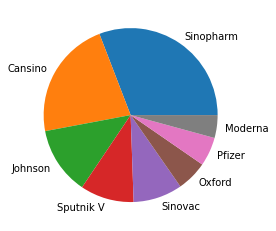

In [31]:
#death rate relation
df_vaccinedr = pd.DataFrame({'Vaccines':['Cansino', 'Johnson', 'Moderna', 'Pfizer','Oxford', 'Sinopharm', 'Sinovac', 'Sputnik V'],
                             'Country':['Ecuador', 'Bulgaria', 'Liechtenstein', 'Czechia', 'Malta', 'Peru', 'Chile','Hungary'],
        'Death_Rate':[6.585028, 3.754320, 1.263151, 1.599815 , 1.696491, 9.184081,2.719716 , 2.971919]})
df_vaccinedr.sort_values(by=['Death_Rate'], inplace = True,ascending=False)
display(df_vaccinedr)
plt.pie([x for x in df_vaccinedr.Death_Rate],labels=[x for x in df_vaccinedr.Vaccines])
plt.show() 

the country which has the highest death rate is peru it used sinopharm vaccine,the country with lowest death rate is liechtenstein which used moderna vaccine.

we now create a new dataframe by concatenating df3_1 and df2 in order to get dataset containing the vaccinations administered in 
different countries and the their corresponding death rate, human development index, gdp per capita, population and so on.

In [32]:
df6 = pd.concat([df3_1.reset_index(drop=False),df2.reset_index(drop=False)], axis=1,join = 'outer')
display(df6)

,location,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V,total_vacc,...,iso_code,date,total_cases,total_deaths,population,aged_65_older,aged_70_older,gdp_per_capita,human_development_index,death_rate
0,Austria,0.0,355225.0,1469583.0,1583091.0,12232947.0,0.0,0.0,0.0,15640846.0,...,LUX,2021-01-01,46415.0,495.0,634814.0,14.312,9.842,94277.965,0.916,1.066466
1,Belgium,0.0,414154.0,2317952.0,2843024.0,14695311.0,0.0,0.0,0.0,20270441.0,...,IRL,2021-01-01,93532.0,2248.0,4982904.0,13.928,8.678,67335.293,0.955,2.403456
2,Bulgaria,0.0,465744.0,413494.0,478451.0,2307659.0,0.0,0.0,0.0,3665348.0,...,NOR,2021-01-01,49803.0,436.0,5465629.0,16.821,10.813,64800.057,0.957,0.875449
3,Chile,573768.0,0.0,0.0,546187.0,7656088.0,0.0,24492388.0,0.0,33268431.0,...,CHE,2021-01-01,452296.0,7948.0,8715494.0,18.436,12.644,57410.166,0.955,1.757256
4,Croatia,0.0,188715.0,454326.0,566471.0,3467745.0,0.0,0.0,0.0,4677257.0,...,HKG,2021-01-01,8888.0,148.0,7552800.0,16.303,10.158,56054.920,0.949,1.665167
5,Cyprus,0.0,26428.0,135203.0,254490.0,1072696.0,0.0,0.0,0.0,1488817.0,...,USA,2021-01-01,20365726.0,353948.0,332915074.0,15.413,9.732,54225.446,0.926,1.737959
6,Czechia,0.0,406202.0,1335985.0,0.0,12856901.0,0.0,0.0,0.0,14599088.0,...,NLD,2021-01-01,806622.0,11556.0,17173094.0,18.779,11.881,48472.545,0.944,1.432641
7,Denmark,0.0,46913.0,1499226.0,155119.0,9608546.0,0.0,0.0,0.0,11309804.0,...,SWE,2021-01-01,437379.0,8727.0,10160159.0,19.985,13.433,46949.283,0.945,1.995295
8,Ecuador,476711.0,0.0,0.0,3720268.0,7965940.0,0.0,15403412.0,0.0,27566331.0,...,DNK,2021-01-01,165930.0,1322.0,5813302.0,19.677,12.325,46682.515,0.940,0.796722
9,Estonia,0.0,74698.0,193162.0,234482.0,1253773.0,0.0,0.0,0.0,1756115.0,...,ISL,2021-01-01,5754.0,29.0,368792.0,14.431,9.207,46482.958,0.949,0.503997


# 7) Countries and the vaccination rate

we add a new column in the above dataframe to calculate the percentage of the population that was vaccinated in different countries.

In [33]:
df6['vacc%']=df6['total_vacc']/df6['population']
display(df6)

,location,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V,total_vacc,...,date,total_cases,total_deaths,population,aged_65_older,aged_70_older,gdp_per_capita,human_development_index,death_rate,vacc%
0,Austria,0.0,355225.0,1469583.0,1583091.0,12232947.0,0.0,0.0,0.0,15640846.0,...,2021-01-01,46415.0,495.0,634814.0,14.312,9.842,94277.965,0.916,1.066466,24.638470
1,Belgium,0.0,414154.0,2317952.0,2843024.0,14695311.0,0.0,0.0,0.0,20270441.0,...,2021-01-01,93532.0,2248.0,4982904.0,13.928,8.678,67335.293,0.955,2.403456,4.067997
2,Bulgaria,0.0,465744.0,413494.0,478451.0,2307659.0,0.0,0.0,0.0,3665348.0,...,2021-01-01,49803.0,436.0,5465629.0,16.821,10.813,64800.057,0.957,0.875449,0.670618
3,Chile,573768.0,0.0,0.0,546187.0,7656088.0,0.0,24492388.0,0.0,33268431.0,...,2021-01-01,452296.0,7948.0,8715494.0,18.436,12.644,57410.166,0.955,1.757256,3.817160
4,Croatia,0.0,188715.0,454326.0,566471.0,3467745.0,0.0,0.0,0.0,4677257.0,...,2021-01-01,8888.0,148.0,7552800.0,16.303,10.158,56054.920,0.949,1.665167,0.619275
5,Cyprus,0.0,26428.0,135203.0,254490.0,1072696.0,0.0,0.0,0.0,1488817.0,...,2021-01-01,20365726.0,353948.0,332915074.0,15.413,9.732,54225.446,0.926,1.737959,0.004472
6,Czechia,0.0,406202.0,1335985.0,0.0,12856901.0,0.0,0.0,0.0,14599088.0,...,2021-01-01,806622.0,11556.0,17173094.0,18.779,11.881,48472.545,0.944,1.432641,0.850114
7,Denmark,0.0,46913.0,1499226.0,155119.0,9608546.0,0.0,0.0,0.0,11309804.0,...,2021-01-01,437379.0,8727.0,10160159.0,19.985,13.433,46949.283,0.945,1.995295,1.113152
8,Ecuador,476711.0,0.0,0.0,3720268.0,7965940.0,0.0,15403412.0,0.0,27566331.0,...,2021-01-01,165930.0,1322.0,5813302.0,19.677,12.325,46682.515,0.940,0.796722,4.741940
9,Estonia,0.0,74698.0,193162.0,234482.0,1253773.0,0.0,0.0,0.0,1756115.0,...,2021-01-01,5754.0,29.0,368792.0,14.431,9.207,46482.958,0.949,0.503997,4.761803


now we sort the data based on vaccination percentage in descending order.

In [34]:
display(df6.sort_values(by="vacc%",ascending=False))

,location,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V,total_vacc,...,date,total_cases,total_deaths,population,aged_65_older,aged_70_older,gdp_per_capita,human_development_index,death_rate,vacc%
10,European Union,0.0,18067172.0,103917705.0,67346458.0,521443295.0,2239173.0,9.0,1845080.0,714858892.0,...,2021-01-01,362911.0,6261.0,9043072.0,19.202,13.748,45436.686,0.922,1.725216,79.050448
25,Peru,0.0,0.0,0.0,3938502.0,27588553.0,18584915.0,0.0,0.0,50111970.0,...,2021-01-01,28406.0,234.0,1325188.0,19.452,13.491,29481.252,0.892,0.823770,37.814989
13,Germany,0.0,3582691.0,22559279.0,12744826.0,111208109.0,0.0,0.0,0.0,150094905.0,...,2021-01-01,36676.0,598.0,5548361.0,21.228,13.264,40585.721,0.938,1.630494,27.052116
0,Austria,0.0,355225.0,1469583.0,1583091.0,12232947.0,0.0,0.0,0.0,15640846.0,...,2021-01-01,46415.0,495.0,634814.0,14.312,9.842,94277.965,0.916,1.066466,24.638470
32,Spain,0.0,1981594.0,15358200.0,9795934.0,54691829.0,0.0,0.0,0.0,81827557.0,...,2021-01-01,212007.0,3961.0,4081657.0,19.724,13.053,22669.797,0.851,1.868335,20.047632
16,Ireland,0.0,237762.0,1028850.0,0.0,6645832.0,0.0,0.0,0.0,7912444.0,...,2021-01-01,12909.0,219.0,516100.0,19.426,11.324,36513.323,0.895,1.696491,15.331223
12,France,0.0,1076036.0,17285962.0,7839413.0,97728389.0,0.0,0.0,0.0,123929800.0,...,2021-01-01,648289.0,19581.0,11632334.0,18.571,12.849,42658.576,0.931,3.020412,10.653907
31,South Korea,0.0,1534360.0,20347203.0,22201778.0,59643446.0,0.0,0.0,0.0,103726787.0,...,2021-01-01,612564.0,16660.0,19212362.0,11.087,6.938,22767.037,0.851,2.719716,5.398961
23,Netherlands,0.0,867080.0,4964796.0,2800755.0,19334592.0,0.0,0.0,0.0,27967223.0,...,2021-01-01,285079.0,2250.0,5449270.0,15.070,9.167,30155.152,0.860,0.789255,5.132288
33,Sweden,0.0,0.0,2348134.0,1334956.0,12963517.0,0.0,0.0,0.0,16646607.0,...,2021-01-01,19753.0,193.0,3485152.0,14.655,10.361,20551.409,0.817,0.977067,4.776436


now we calculate the correlation between various vaccines with death rate and gdp per capita 

In [35]:
print("CanSino vs death rate \n")
col3 = df6['CanSino']
col4 = df6['gdp_per_capita']
corr1 = col3.corr(col4)
print(corr1,"\n\n")

print("Johnson&Johnson vs death rate \n")
col3 = df6['Johnson&Johnson']
col4 = df6['gdp_per_capita']
corr2 = col3.corr(col4)
print(corr2,"\n\n")

print("Oxford/AstraZeneca vs death rate \n")
col3 = df6['Oxford/AstraZeneca']
col4 = df6['gdp_per_capita']
corr3 = col3.corr(col4)
print(corr3,"\n\n")

print("Sinopharm/Beijing vs death rate \n")
col3 = df6['Sinopharm/Beijing']
col4 = df6['gdp_per_capita']
corr4 = col3.corr(col4)
print(corr4,"\n\n")

print("Sinovac vs death rate \n")
col3 = df6['Sinovac']
col4 = df6['gdp_per_capita']
corr5 = col3.corr(col4)
print(corr5,"\n\n")

print("Pfizer/BioNTech vs death rate \n")
col3 = df6['Pfizer/BioNTech']
col4 = df6['gdp_per_capita']
corr6 = col3.corr(col4)
print(corr6,"\n\n")

print("Moderna vs death rate \n")
col3 = df6['Moderna']
col4 = df6['gdp_per_capita']
corr7 = col3.corr(col4)
print(corr7,"\n\n")

print("Sputnik V vs death rate \n")
col3 = df6['Sputnik V']
col4 = df6['gdp_per_capita']
corr8 = col3.corr(col4)
print(corr8,"\n\n")

print("Gdp Per Capita vs Moderna \n")
col1 = df6['gdp_per_capita']
col2 = df6['Moderna']
corra = col1.corr(col2)
print(corra,"\n\n")

print("Gdp Per Capita vs CanSino \n")
col1 = df6['gdp_per_capita']
col2 = df6['CanSino']
corrb = col1.corr(col2)
print(corrb,"\n\n")

print("Gdp Per Capita vs Sinovac \n")
col1 = df6['gdp_per_capita']
col2 = df6['Sinovac']
corrc = col1.corr(col2)
print(corrc,"\n\n")

print("Gdp Per Capita vs Johnson&Johnson\n")
col1 = df6['gdp_per_capita']
col2 = df6['Johnson&Johnson']
corrd = col1.corr(col2)
print(corrd,"\n\n")

print("Gdp Per Capita vs Oxford/AstraZeneca \n")
col1 = df6['gdp_per_capita']
col2 = df6['Oxford/AstraZeneca']
corre = col1.corr(col2)
print(corre,"\n\n")

print("Gdp Per Capita vs Pfizer/BioNTech \n")
col1 = df6['gdp_per_capita']
col2 = df6['Pfizer/BioNTech']
corrf = col1.corr(col2)
print(corrf,"\n\n")

print("Gdp Per Capita vs Sinopharm/Beijing \n")
col1 = df6['gdp_per_capita']
col2 = df6['Sinopharm/Beijing']
corrg = col1.corr(col2)
print(corrg,"\n\n")

print("Gdp Per Capita vs Sinovac \n")
col1 = df6['gdp_per_capita']
col2 = df6['Sinovac']
corrh = col1.corr(col2)
print(corrh,"\n\n")

print("Gdp Per Capita vs Sputnik V \n")
col1 = df6['gdp_per_capita']
col2 = df6['Sputnik V']
corri = col1.corr(col2)
print(corri,"\n\n")

CanSino vs death rate 

0.21508137668220864 


Johnson&Johnson vs death rate 

0.05007471148063776 


Oxford/AstraZeneca vs death rate 

0.011394309291261005 


Sinopharm/Beijing vs death rate 

-0.07444845613879285 


Sinovac vs death rate 

0.1015281257839782 


Pfizer/BioNTech vs death rate 

0.05448067838661277 


Moderna vs death rate 

0.013997320742313827 


Sputnik V vs death rate 

0.062146629936777546 


Gdp Per Capita vs Moderna 

0.013997320742313827 


Gdp Per Capita vs CanSino 

0.2150813766822086 


Gdp Per Capita vs Sinovac 

0.1015281257839782 


Gdp Per Capita vs Johnson&Johnson

0.05007471148063776 


Gdp Per Capita vs Oxford/AstraZeneca 

0.011394309291261005 


Gdp Per Capita vs Pfizer/BioNTech 

0.054480678386612774 


Gdp Per Capita vs Sinopharm/Beijing 

-0.07444845613879285 


Gdp Per Capita vs Sinovac 

0.1015281257839782 


Gdp Per Capita vs Sputnik V 

0.062146629936777546 




based on the correlation values we obtained above, we made a new dataframe combining the above values as shown below and 
plotted a distance plot of the data as well.

,GDP,DR
0,0.215081,0.013997
1,0.050075,0.215081
2,0.011394,0.101528
3,-0.074448,0.050075
4,0.101528,0.011394
5,0.054481,0.054481
6,0.013997,-0.074448
7,0.062147,0.101528


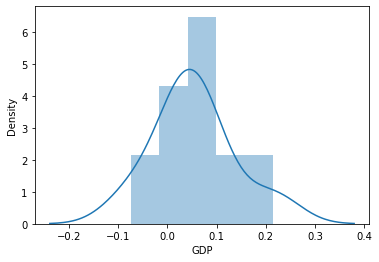

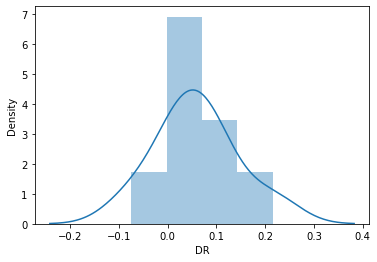

In [36]:
df_scatt = pd.DataFrame({'GDP':[corr1, corr2, corr3, corr4,corr5, corr6, corr7, corr8],'DR':[corra,corrb,corrc,corrd,corre,corrf,corrg,corrh]})
display(df_scatt)
sns.distplot(df_scatt['GDP'])
plt.show()
sns.distplot(df_scatt['DR'])
plt.show()

#### Here we have plotted the correlation of gdp with its density so from this graph we can infer that for certain range of gdp there is certain vaccine which that country use.
#### The second graph correlation of death rate with the density shows us that some vaccine are not so efficient to control the deathrate.so it is affecting the countries deathrate.

#### now we find out the effect of vaccine percentage on the death rate

# 8) Does age affect the death rate. Countries with older people maybe more prone to a higher death rate?

In [37]:
print("Overall death rate vs vaccine percentage Correlation")
correlation = df6.corr()
display(correlation)

Overall death rate vs vaccine percentage Correlation


,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V,total_vacc,Cansino%,...,index,total_cases,total_deaths,population,aged_65_older,aged_70_older,gdp_per_capita,human_development_index,death_rate,vacc%
CanSino,1.000000,-0.079509,-0.088910,-0.045385,-0.066725,-0.048858,0.929347,-0.056884,-0.030688,0.995386,...,0.069947,-0.052300,-0.073322,-0.086068,0.085092,0.069074,0.215081,0.255938,-0.120707,-0.049941
Johnson&Johnson,-0.079509,1.000000,0.966121,0.953959,0.980267,0.055039,-0.104630,0.668822,0.978456,-0.079867,...,-0.326209,-0.068677,-0.088570,-0.096056,0.096783,0.131197,0.050075,0.084788,-0.060369,0.840589
Moderna,-0.088910,0.966121,1.000000,0.960751,0.988813,0.042945,-0.109180,0.635367,0.988932,-0.089310,...,-0.364792,-0.076794,-0.091392,-0.090040,0.032620,0.067105,0.013997,0.068066,-0.024876,0.825811
Oxford/AstraZeneca,-0.045385,0.953959,0.960751,1.000000,0.961628,0.102147,-0.061737,0.638970,0.970246,-0.042470,...,-0.406744,-0.067290,-0.074865,-0.103876,0.004768,0.047070,0.011394,0.041800,-0.011850,0.840728
Pfizer/BioNTech,-0.066725,0.980267,0.988813,0.961628,1.000000,0.099881,-0.086969,0.655636,0.998374,-0.066985,...,-0.353927,-0.074743,-0.091050,-0.092356,0.067869,0.108853,0.054481,0.110374,-0.047638,0.861363
Sinopharm/Beijing,-0.048858,0.055039,0.042945,0.102147,0.099881,1.000000,-0.064518,0.127216,0.114413,-0.049078,...,-0.193762,-0.045373,-0.055836,-0.070350,0.097207,0.128157,-0.074448,0.004692,-0.136838,0.430845
Sinovac,0.929347,-0.104630,-0.109180,-0.061737,-0.086969,-0.064518,1.000000,-0.075115,-0.048376,0.912433,...,0.122570,-0.057945,-0.015686,-0.043117,-0.061406,-0.056950,0.101528,0.082975,0.165590,-0.089596
Sputnik V,-0.056884,0.668822,0.635367,0.638970,0.655636,0.127216,-0.075115,1.000000,0.656975,-0.057140,...,-0.295630,0.033855,0.048354,0.040510,0.113404,0.144385,0.062147,0.081427,-0.010010,0.532034
total_vacc,-0.030688,0.978456,0.988932,0.970246,0.998374,0.114413,-0.048376,0.656975,1.000000,-0.031370,...,-0.361989,-0.077889,-0.091735,-0.097043,0.057895,0.099074,0.047004,0.101177,-0.038120,0.865425
Cansino%,0.995386,-0.079867,-0.089310,-0.042470,-0.066985,-0.049078,0.912433,-0.057140,-0.031370,1.000000,...,0.043162,-0.053512,-0.074903,-0.087021,0.089022,0.068162,0.208669,0.253714,-0.127962,-0.049460


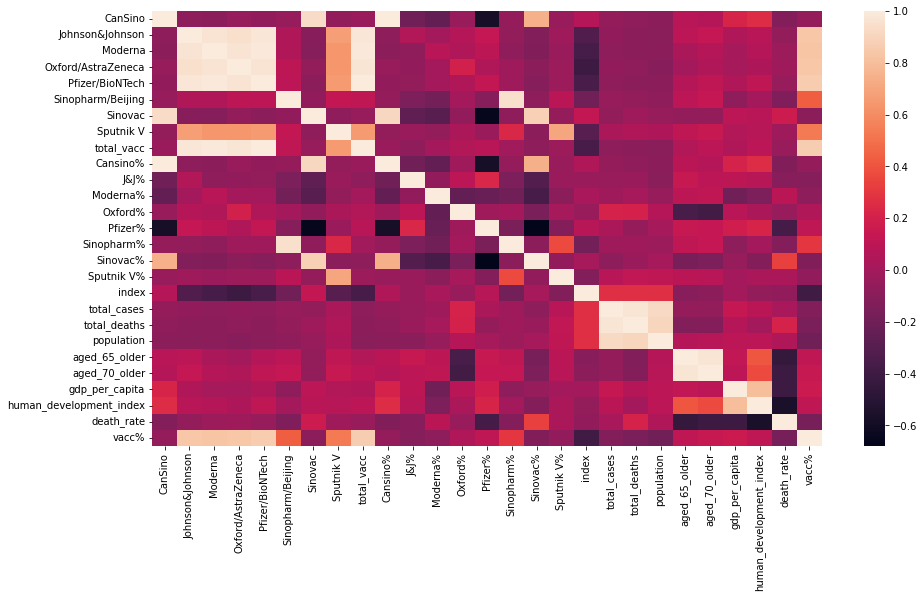

In [38]:
plt.figure(figsize = (15,8))
sns.heatmap(correlation)
plt.show()

### Here we have done a Correlation analysis of the vaccination percentage of different countries along with other attributes.

# Conclusion

### 1) We distinguished and got that Peru, Ecuador and Ukraine were the poorer countries whereas the rest were developed. This shows that our dataset did not have a proper distribution.
### 2) We made the plots for the developed and under developed countries and found out that as one might expect the underdeveloped countries have a higher death rate than the more developed ones. However, this can also be attributed the population of the countries as peru had the highest death rate and it had a higher population than most of the rich countries. The death rate might also be higher because the country had a higher population and a less GDP which will synergize and wreak havoc as expected.
### 3) Though the leaders of the group were more developing countries, there were many countries that were in the developed category that ranked higher than Ukraine (a developing country), which shows that  not all developed countries have less death rate.
### 4) As seen from code line 18, the countries were listed with the various vaccines that they used, moreover, we can see what countries used which vaccine the most.
### 5) In code line 27 we can see the percentage breakdown of each vaccine according to respective countries and as expected the countries with higher GDP have predominantly used more expensive Vaccines such as Pfizer and Moderna whereas countries with less GDP and not part of the europian union had to use cheaper vaccines which had less efficacy.
### 6) As seen from code line 31 and the pie chart, the countries with lowest GDP had the highest death rate. They had a higher death rate because they could not afford more expensive Vaccines which had more efficacy. As expected the country with the highest death rate had a vaccine that used old technology and was thus cheaper and less effective against the virus. 
### 7) The country definitely has a positive correlation with the total deaths and total cases as inferred from the heat map, and this is also proven by the previous insights where all the poorer countries were higher up in the list in the death rate sheet. Also, this could mean that richer countries also had a correlation with the death rate which we would not expect given how they can afford the better vaccines.
### 8) The Heat map shows that age and death rate does not have a positive correlation whih was quite unexpected as geriatrics are expected to have a weaker immune system thus they are more susceptible to face adverse reactions after contracting the virus. 

### Moreover from the heat map we can see how vaccine percentage has a negative correlation with total deaths and cases, which means that getting vaccinated results in less number of deaths and cases across the world. 

### Also we can see that elder people have a negative correlation with death rate, this might be due to the fact that they were the first ones to be injected with the vaccines, and since our dataset is spanning the early years, the elder people might be negatively correlated.

